In [1]:
pip install tensorflow==2.10


     ------------------------------------ 455.9/455.9 MB 105.9 kB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 330.3 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 231.4 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 306.9 kB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully u

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [11]:
checkpoints = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [12]:
train_dir = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 12\computer vision\train'
validation_dir = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 12\computer vision\validation'
test_dir = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 12\computer vision\test'

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [17]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [18]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=4,
                    callbacks=callbacks)

Epoch 1/4
50/50 [==============================] - ETA: 0s - loss: 0.8868 - acc: 0.6481 
Epoch 1: val_loss improved from inf to 0.51090, saving model to C:\Users\musta\Desktop\ML lab\lab 12\E1-cp-0001-loss0.51.h5
50/50 [==============================] - 734s 15s/step - loss: 0.8868 - acc: 0.6481 - val_loss: 0.5109 - val_acc: 0.7857
Epoch 2/4
50/50 [==============================] - ETA: 0s - loss: 0.5065 - acc: 0.7769 
Epoch 2: val_loss improved from 0.51090 to 0.42960, saving model to C:\Users\musta\Desktop\ML lab\lab 12\E1-cp-0002-loss0.43.h5
50/50 [==============================] - 670s 13s/step - loss: 0.5065 - acc: 0.7769 - val_loss: 0.4296 - val_acc: 0.7817
Epoch 3/4
50/50 [==============================] - ETA: 0s - loss: 0.4315 - acc: 0.7969 
Epoch 3: val_loss improved from 0.42960 to 0.42892, saving model to C:\Users\musta\Desktop\ML lab\lab 12\E1-cp-0003-loss0.43.h5
50/50 [==============================] - 740s 15s/step - loss: 0.4315 - acc: 0.7969 - val_loss: 0.4289 - val_ac

In [19]:
model_history.history

{'loss': [0.8868380188941956,
  0.5065184235572815,
  0.43153899908065796,
  0.3697335124015808],
 'acc': [0.6481249928474426, 0.7768750190734863, 0.796875, 0.8387500047683716],
 'val_loss': [0.5109046101570129,
  0.42960333824157715,
  0.42892029881477356,
  0.35430046916007996],
 'val_acc': [0.7857142686843872,
  0.7817460298538208,
  0.8134920597076416,
  0.829365074634552]}

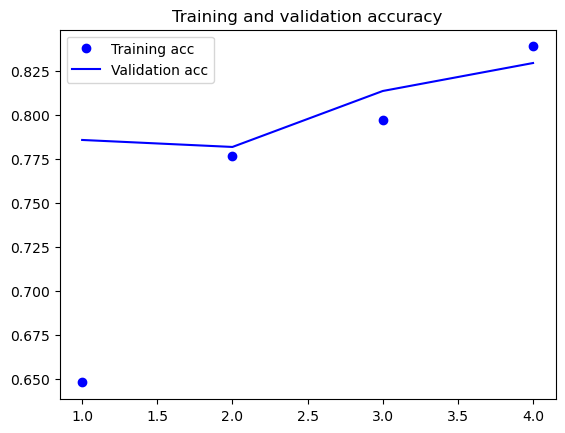

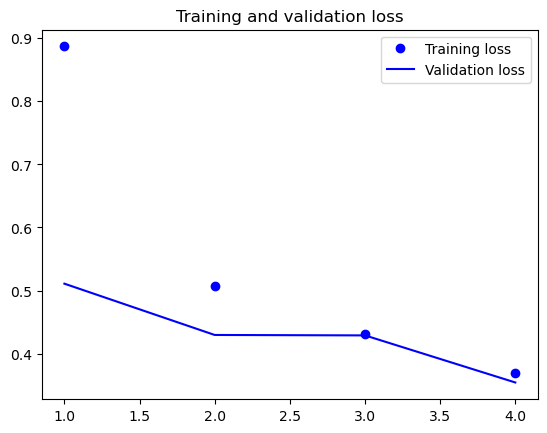

<Figure size 640x480 with 0 Axes>

In [20]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 12\model_Accuracy.png')

In [21]:
model.save(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 12\E1-cp-0004-loss0.35.h5')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 37s 5s/step


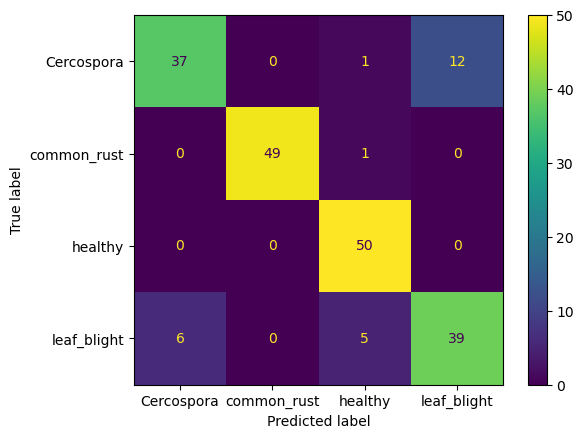

In [22]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [23]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.86      0.74      0.80        50
 common_rust       1.00      0.98      0.99        50
     healthy       0.88      1.00      0.93        50
 leaf_blight       0.76      0.78      0.77        50

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200

